In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from numpy.random import choice

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [3]:
df = pd.read_csv('stud_math.csv', encoding="utf-8")

### Первичный осмотр данных

In [4]:
df.sample(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
143,GP,F,16,U,LE3,T,1.0,1.0,at_home,at_home,course,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,4.0,4.0,1.0,2.0,65.0
197,GP,M,16,R,LE3,NaN,3.0,3.0,teacher,other,home,father,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,no,3.0,3.0,4.0,3.0,8.0,50.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
363,MS,F,17,U,LE3,T,4.0,4.0,at_home,NaN,NaN,mother,1.0,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,yes,2.0,3.0,4.0,1.0,0.0,75.0
162,GP,M,16,U,LE3,T,1.0,2.0,other,other,course,mother,2.0,1.0,1.0,no,no,no,yes,yes,-3.0,yes,NaN,NaN,4.0,4.0,4.0,5.0,0.0,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
209,GP,F,17,R,GT3,T,4.0,3.0,teacher,other,reputation,mother,2.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,4.0,4.0,2.0,4.0,6.0,35.0
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,NaN,NaN,-6.0,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
333,GP,F,18,U,LE3,NaN,2.0,2.0,other,other,home,other,1.0,2.0,0.0,no,no,no,yes,no,-6.0,yes,NaN,yes,4.0,3.0,3.0,2.0,0.0,0.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0


In [5]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15
address,U,U,U,U,U,U,NaN,U,U,U,U,U,U,U,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN,GT3,GT3,LE3,GT3,GT3
Pstatus,A,NaN,T,T,T,T,T,A,A,NaN,T,NaN,T,T,A
Medu,4,1,1,4,3,4,2,4,3,3,4,2,4,4,2
Fedu,4,1,1,2,3,3,2,4,2,4,4,40,4,3,2
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,teacher,services,health,teacher,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other,health,other,services,other,other


In [1]:
df.memory_usage(deep=True)

NameError: name 'df' is not defined

In [6]:
df.shape

(395, 30)

In [7]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

<AxesSubplot:>

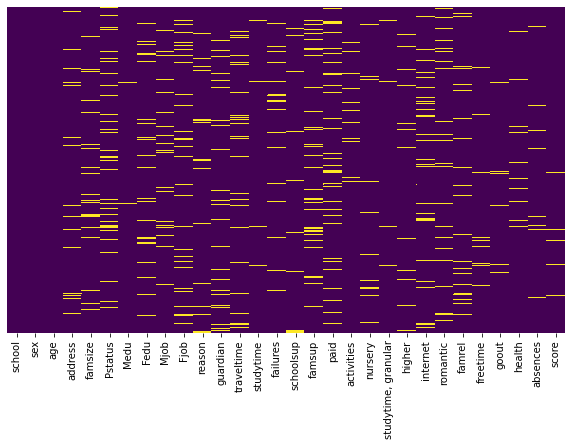

In [8]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

* Почти во всех столюбцах есть пропуски. Наибольшее количество в Pstatus и Paid

In [9]:
df_copy = df.copy(deep=True)

In [10]:
df_copy = df_copy.dropna(how="any")
df_copy.shape

(97, 30)

In [11]:
df_copy.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,0.143682,-0.220209,0.320914,0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
Medu,-0.071662,1.000000,0.684379,-0.248099,-0.042491,-0.135065,0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
Fedu,-0.056929,0.684379,1.000000,-0.162149,-0.001350,-0.189926,0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,0.143682,-0.248099,-0.162149,1.000000,-0.034571,-0.029138,0.034571,-0.134113,-0.071376,-0.094331,0.147160,-0.148719,-0.094874
studytime,-0.220209,-0.042491,-0.001350,-0.034571,1.000000,-0.016541,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.320914,-0.135065,-0.189926,-0.029138,-0.016541,1.000000,0.016541,-0.095520,-0.043110,-0.021022,0.057279,0.239602,-0.314698
"studytime, granular",0.220209,0.042491,0.001350,0.034571,-1.000000,0.016541,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
famrel,0.057039,-0.032146,-0.059084,-0.134113,0.025253,-0.095520,-0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.071376,-0.226503,-0.043110,0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.094331,-0.129162,-0.021022,0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187


In [12]:
df_copy[["studytime", "studytime, granular"]].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [13]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [14]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Binary Data

In [15]:
# binary data
df_binary = df.loc[:, ["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       #"Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic", 
                       "score"]]

In [16]:
# binary data without NaN
df_binary_noNaN = df.loc[:, ["school", 
                             "sex", 
                             "address", 
                             "famsize", 
                             #"Pstatus", 
                             "schoolsup", 
                             "famsup", 
                             "paid", 
                             "activities", 
                             "nursery", 
                             "higher", 
                             "internet", 
                             "romantic", 
                             "score"]].dropna(how="any")

In [17]:
df_binary_noNaN.shape

(194, 13)

In [18]:
# binary data with dummies
df_binary_dummies = pd.get_dummies(df_binary_noNaN, columns=["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       #"Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"], drop_first = True)

In [19]:
df_binary_dummies.head(10)

,score,school_MS,sex_M,address_U,famsize_LE3,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,30.0,0,0,1,0,0,1,0,0,0,1,1,0
3,75.0,0,0,1,0,0,1,1,1,1,1,1,1
4,50.0,0,0,1,0,0,1,1,0,1,1,0,0
5,75.0,0,1,1,1,0,1,1,1,1,1,1,0
7,30.0,0,0,1,0,1,1,0,0,1,1,0,0
8,95.0,0,1,1,1,0,1,1,0,1,1,1,0
10,45.0,0,0,1,0,0,1,1,0,1,1,1,0
11,60.0,0,0,1,0,0,1,0,1,1,1,1,0
14,80.0,0,1,1,0,0,1,0,0,1,1,1,1
15,70.0,0,0,1,0,0,1,0,0,1,1,1,0


In [20]:
corrMatt = df_binary_dummies.corr()

<AxesSubplot:>

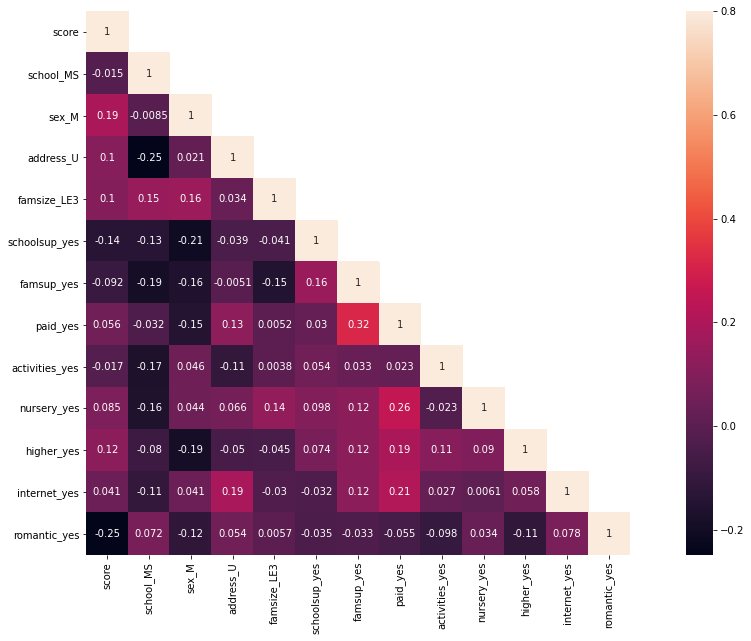

In [21]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [22]:
df[["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       "Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"]].isnull().sum()

school         0
sex            0
address       17
famsize       27
Pstatus       45
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
dtype: int64

#### Заполняем пропущенные данные в binary data

In [23]:
# sex -- schoolsup
# Мужской пол студента и доп. образов. поддержка негативно скоррелированны

def sex_schoolsup(row):
    elements = ['yes', 'no'] 
    weights_M = [0.2, 0.8] # вероятности (веса) выбора элемента, если независимая переменная == "M"
    weights_F = [0.8, 0.2] # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.schoolsup):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.schoolsup

In [24]:
df["schoolsup"] = df.apply(sex_schoolsup, axis = 1)

In [25]:
df["schoolsup"].value_counts()

no     340
yes     55
Name: schoolsup, dtype: int64

In [26]:
# sex -- higher
# Мужской пол студента и его желание получить высшее обр. негативно скореллированны

def sex_higher(row):
    elements = ['yes', 'no'] 
    weights_M = [0.25, 0.75] # вероятности (веса) выбора элемента, если независимая переменная == "M"
    weights_F = [0.75, 0.25] # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.higher):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.higher

In [27]:
df["higher"] = df.apply(sex_higher, axis = 1)

In [28]:
df["higher"].value_counts()

yes    364
no      31
Name: higher, dtype: int64

In [29]:
# sex -- famsize
# интересна пол. корр. мужского пола ребенка и небольшого размера семьи
# Возможно, объяснение в том, что в развивающихся странах родители стремятся получить мальчика, 
# поэтому девочки чаще встречаются в больших семьях

def sex_famsize(row):
    elements = ['LE3', 'GT3'] 
    weights_M = [0.80, 0.20]
    weights_F = [0.20, 0.80]
    if pd.isnull(row.famsize):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.famsize

In [30]:
df["famsize"] = df.apply(sex_famsize, axis = 1)

In [31]:
df["famsize"].value_counts()

GT3    271
LE3    124
Name: famsize, dtype: int64

In [32]:
# famsize -- famsup
# больше семья ("GT3") - выше вероятность семейной образовательной поддержки

def famsize_famsup(row):
    elements = ['yes', 'no'] 
    weights_LE3 = [0.20, 0.80]
    weights_GT3 = [0.80, 0.20]
    if pd.isnull(row.famsup):
        if row.famsize == "LE3":
            return choice(elements, p=weights_LE3)
        return choice(elements, p=weights_GT3)
    return row.famsup

In [33]:
df["famsup"] = df.apply(famsize_famsup, axis = 1)

In [34]:
df["famsup"].value_counts()

yes    245
no     150
Name: famsup, dtype: int64

In [35]:
# school -- address
# Дети, живущие за городом, чаще ходят в школу MS

def school_address(row):
    elements = ['U', 'R'] 
    weights_GP = [0.80, 0.20]
    weights_MS = [0.20, 0.80]
    if pd.isnull(row.address):
        if row.school == "GP":
            return choice(elements, p=weights_GP)
        return choice(elements, p=weights_MS)
    return row.address   

In [36]:
df["address"] = df.apply(school_address, axis = 1)

In [37]:
df["address"].value_counts()

U    305
R     90
Name: address, dtype: int64

In [38]:
# school -- activities
# Учащиеся в школе MS имеют меньше времени на внеучебные занятия

def school_activities(row):
    elements = ['yes', 'no'] 
    weights_GP = [0.70, 0.30]
    weights_MS = [0.30, 0.70]   
    if pd.isnull(row.activities):
        if row.school == "GP":
            return choice(elements, p=weights_GP)
        return choice(elements, p=weights_MS)
    return row.activities 

In [39]:
df["activities"] = df.apply(school_activities, axis = 1)

In [40]:
df["activities"].value_counts()

yes    206
no     189
Name: activities, dtype: int64

In [41]:
# famsup -- paid
# поддержка семьи положительно влияет на наличие платных занятий по математике

def famsup_paid(row):
    elements = ['yes', 'no'] 
    weights_yes = [0.9, 0.1]
    weights_no = [0.1, 0.9]   
    if pd.isnull(row.paid):
        if row.famsup == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.paid 

In [42]:
df["paid"] = df.apply(famsup_paid, axis = 1)

In [43]:
df["paid"].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [44]:
# paid -- internet
# Платные занятия по математике положительно скоррелированны с наличием доступа к интернету дома

def paid_internet(row):
    elements = ['yes', 'no'] 
    weights_yes = [0.8, 0.2]
    weights_no = [0.2, 0.8]   
    if pd.isnull(row.internet):
        if row.paid == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.internet     

In [45]:
df["internet"] = df.apply(paid_internet, axis = 1)

In [46]:
df["internet"].value_counts()

yes    315
no      80
Name: internet, dtype: int64

In [47]:
# paid -- nursery
# Если родители платят за доп. занятия по математике, высока вероятность, что ребенок посещал дет. сад

def paid_nursery(row):
    elements = ['yes', 'no'] 
    weights_yes = [0.8, 0.2]
    weights_no = [0.2, 0.8]   
    if pd.isnull(row.nursery):
        if row.paid == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.nursery

In [48]:
df["nursery"] = df.apply(paid_nursery, axis = 1)

In [49]:
df["nursery"].value_counts()

yes    307
no      88
Name: nursery, dtype: int64

In [50]:
# sex -- romantic
# в нашем датасете девочки мальчиков состоят в романтических отношениях

def sex_romantic(row):
    elements = ['yes', 'no'] 
    weights_F = [0.7, 0.3]
    weights_M = [0.3, 0.7]   
    if pd.isnull(row.romantic):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.romantic

In [51]:
df["romantic"] = df.apply(sex_romantic, axis = 1)

In [52]:
df["romantic"].value_counts()

no     254
yes    141
Name: romantic, dtype: int64

In [53]:
# Переменная Pstatus не влияет зависимую переменную score. Удалим ее

df.drop("Pstatus", axis=1, inplace=True)

In [54]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [55]:
df_binary.shape

(395, 13)

In [56]:
df_binary.loc[:, "sex":].dropna(how="all").shape


(395, 12)

graph for school


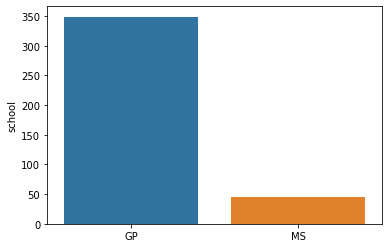

graph for sex


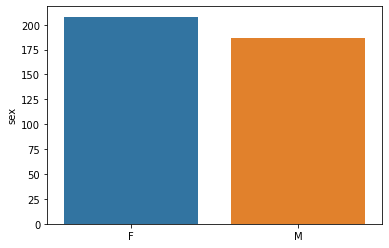

graph for address


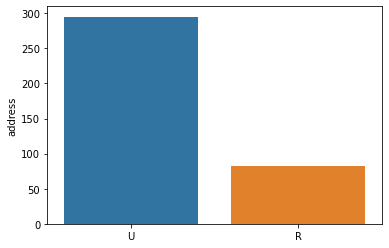

graph for famsize


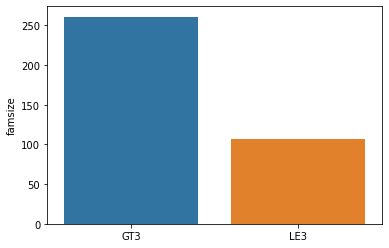

graph for schoolsup


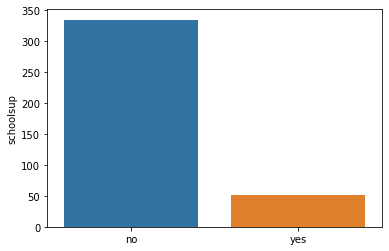

graph for famsup


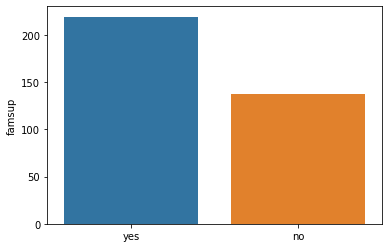

graph for paid


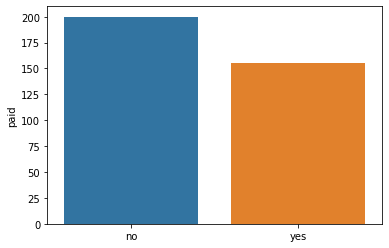

graph for activities


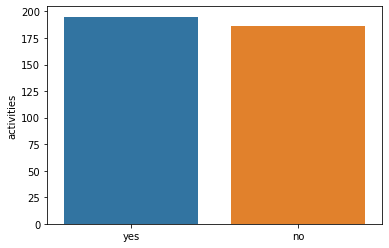

graph for nursery


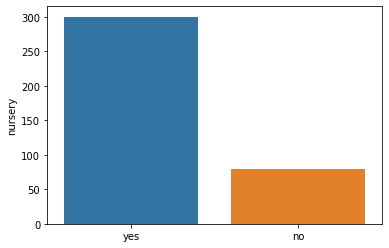

graph for higher


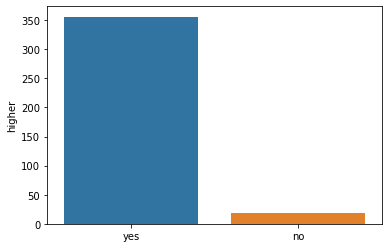

graph for internet


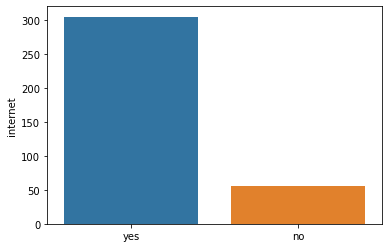

graph for romantic


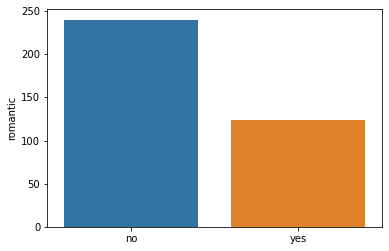

graph for score


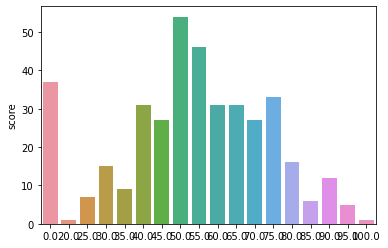

In [57]:
for i in df_binary.columns:
    bin_num = df_binary[i].value_counts(normalize=False)
    print("graph for %s" % (i))
    sns.barplot(x = bin_num.index, y = bin_num)
    plt.show()

### Nominal Data

In [60]:
# nominal data
df_nominal = df.loc[:, ["Mjob", "Fjob", "reason", "guardian"]]

In [61]:
# nominal data without NaN
df_nominal_noNaN = df.loc[:, ["Mjob", "Fjob", "reason", "guardian"]].dropna(how="any")

In [62]:
df_nominal_noNaN.shape

(298, 4)

graph for Mjob


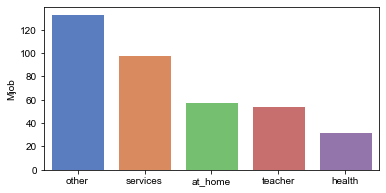

graph for Fjob


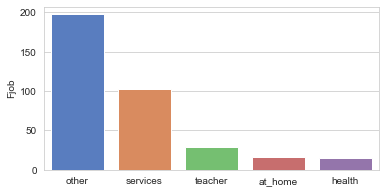

graph for reason


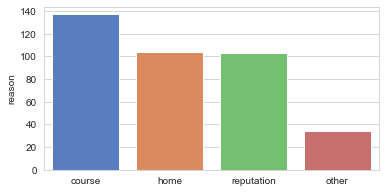

graph for guardian


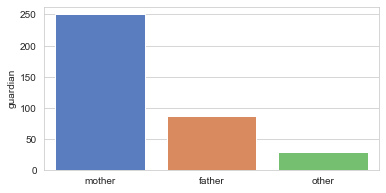

In [63]:
for i in df_nominal.columns:
    nom_num = df_nominal[i].value_counts()
    print("graph for %s" % (i))
    plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.barplot(x = nom_num.index, y = nom_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

In [64]:
# Дисперсионный анализ проверяет влияние номинативной переменной на количественную.

<AxesSubplot:xlabel='Mjob', ylabel='score'>

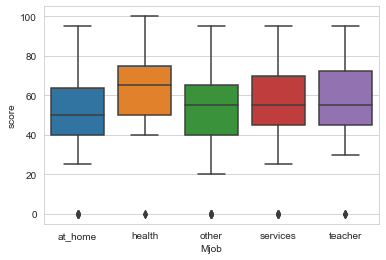

In [65]:
sns.boxplot(x="Mjob", y="score", data = df)

In [67]:
df["Mjob"].isna().sum()

19

In [68]:
w_mjobs = df["Mjob"].value_counts(normalize=True).tolist()

In [69]:
def mjob_fill(row):
    elements = ["other", "services", "at_home", "teacher", "health"]
    weights = w_mjobs # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.Mjob):
        return choice(elements, p=weights)
    return row.Mjob

In [70]:
df["Mjob"] = df.apply(mjob_fill, axis = 1)

In [71]:
df["Mjob"].isna().sum()

0

<AxesSubplot:xlabel='Fjob', ylabel='score'>

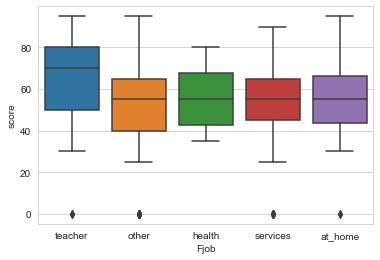

In [72]:
sns.boxplot(x="Fjob", y="score", data = df)

In [73]:
df["Fjob"].isnull().sum()

36

In [74]:
# Fjob  .tolist()
el_fjobs = df["Fjob"].value_counts(normalize=True).index.tolist()
w_fjobs = df["Fjob"].value_counts(normalize=True).values.tolist()

In [75]:
print(el_fjobs)
print(w_fjobs)

['other', 'services', 'teacher', 'at_home', 'health']
[0.5487465181058496, 0.2841225626740947, 0.0807799442896936, 0.04456824512534819, 0.04178272980501393]


In [76]:
def fjob_fill(row):
    elements = el_fjobs
    weights = w_fjobs
    if pd.isnull(row.Fjob):
        return choice(elements, p=weights)
    return row.Fjob

In [77]:
df["Fjob"] = df.apply(fjob_fill, axis=1)

In [78]:
df["Fjob"].isna().sum()

0

<AxesSubplot:xlabel='reason', ylabel='score'>

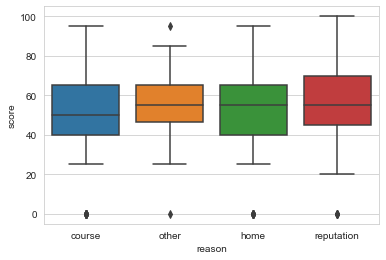

In [79]:
sns.boxplot(x="reason", y="score", data = df)

<AxesSubplot:xlabel='guardian', ylabel='score'>

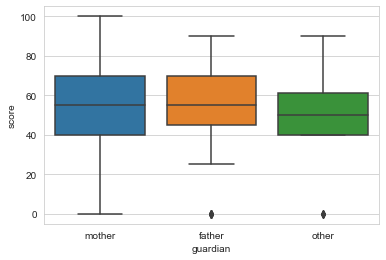

In [80]:
sns.boxplot(x="guardian", y="score", data = df)

In [81]:
df.groupby("Mjob").score.mean()

Mjob
at_home     46.583333
health      58.676471
other       50.333333
services    55.099010
teacher     53.898305
Name: score, dtype: float64

In [82]:
# Не похоже, чтобы переменные reason и guardian оказывали влияние на score. Удилим их

In [83]:
df.drop(["reason", "guardian"], axis=1, inplace=True)

In [84]:
df.isna().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

### Ordinal Data

In [85]:
# ordinal data
df_ordinal = df.loc[:, ["Medu", 
                        "Fedu", 
                        "traveltime", 
                        "studytime", 
                        "failures", 
                        "famrel", 
                        "freetime", 
                        "goout", 
                        "health"]]

In [86]:
# ordinal data without NaN
df_ordinal_noNaN = df.loc[:, ["Medu", 
                        "Fedu", 
                        "traveltime", 
                        "studytime", 
                        "failures", 
                        "famrel", 
                        "freetime", 
                        "goout", 
                        "health"]].dropna(how="any")

In [87]:
df_ordinal_noNaN.shape

(275, 9)

graph for Medu


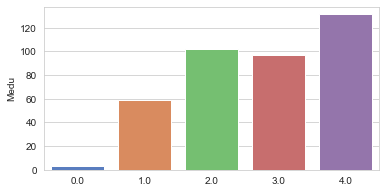

graph for Fedu


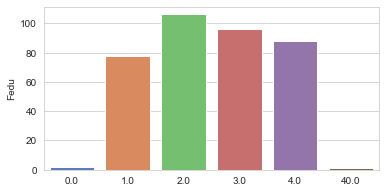

graph for traveltime


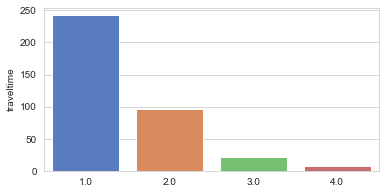

graph for studytime


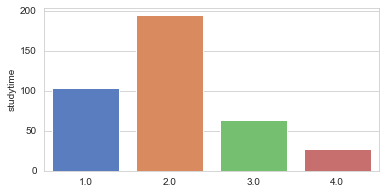

graph for failures


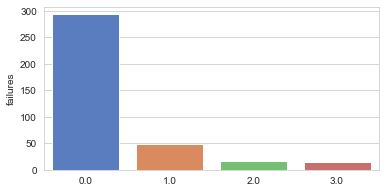

graph for famrel


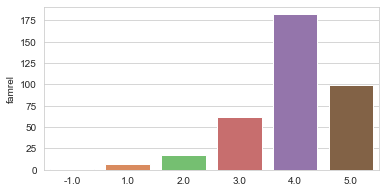

graph for freetime


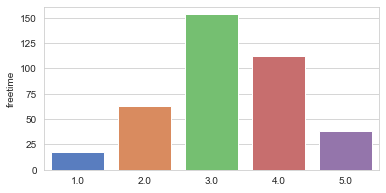

graph for goout


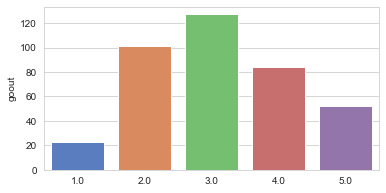

graph for health


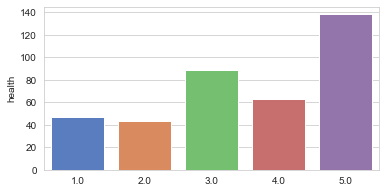

In [88]:
for i in df_ordinal.columns:
    ord_num = df_ordinal[i].value_counts()
    print("graph for %s" % (i))
    plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.barplot(x = ord_num.index, y = ord_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

In [89]:
df_bin_ord_dummies = pd.get_dummies(df, columns=["school", 
                                                 "sex", 
                                                 "address", 
                                                 "famsize",  
                                                 "schoolsup", 
                                                 "famsup", 
                                                 "paid", 
                                                 "activities", 
                                                 "nursery", 
                                                 "higher", 
                                                 "internet", 
                                                 "romantic"], drop_first=True)

<AxesSubplot:>

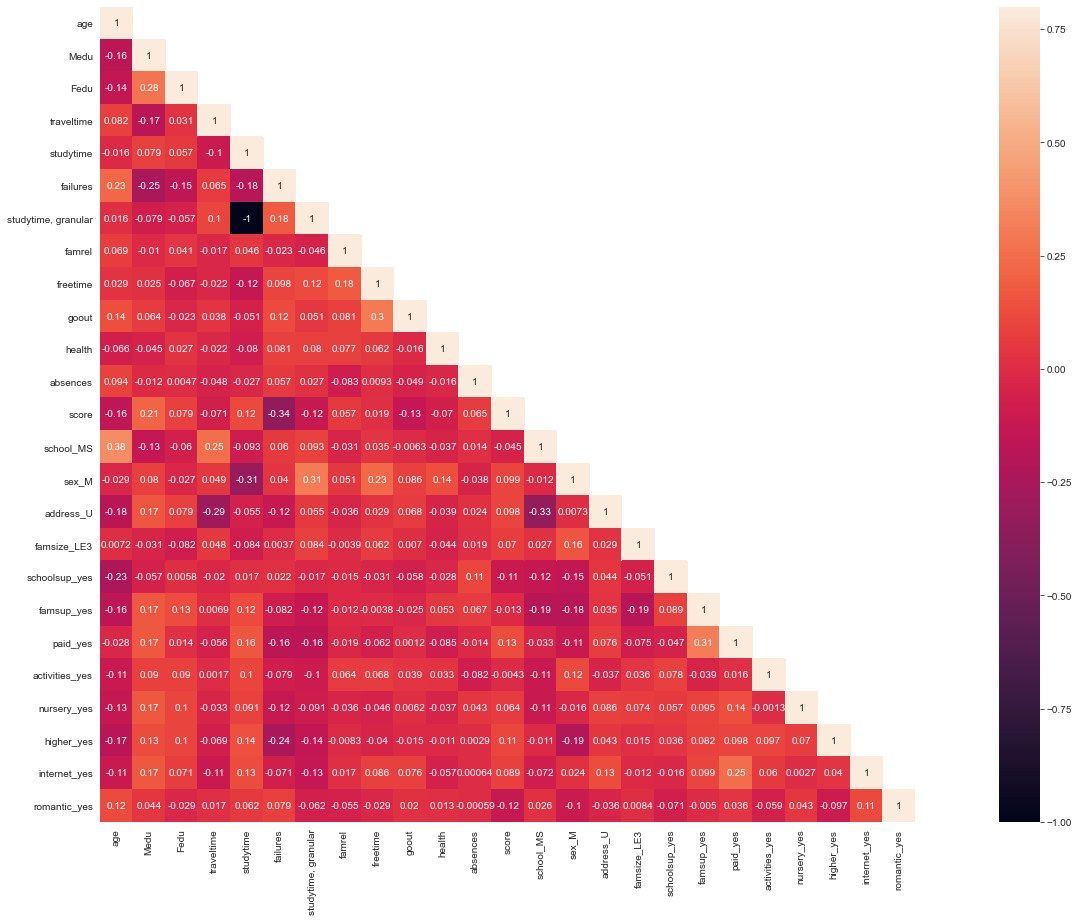

In [90]:
corrMatt = df_bin_ord_dummies.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [91]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [92]:
# Medu
el_medu = df.Medu.value_counts(normalize=True).index.tolist()
w_medu = df.Medu.value_counts(normalize=True).tolist()
print(el_medu)
print(w_medu)

[4.0, 2.0, 3.0, 1.0, 0.0]
[0.33418367346938777, 0.2602040816326531, 0.24744897959183673, 0.15051020408163265, 0.007653061224489796]


In [93]:
def medu_fill(row):
    elements = el_medu
    weights = w_medu 
    if pd.isnull(row.Medu):
        return choice(elements, p=weights)
    return row.Medu

In [94]:
df["Medu"] = df.apply(medu_fill, axis=1)

In [95]:
df["Medu"].isna().sum()

0

In [96]:
# Fedu

In [97]:
# Уберем выброс
df["Fedu"] = df.Fedu.apply(lambda x: 4.0 if x > 4.0 else x)

In [98]:
# Заполним пропуски

In [99]:
el_fedu = df.Fedu.value_counts(normalize=True).index.tolist()
w_fedu = df.Fedu.value_counts(normalize=True).tolist()

In [100]:
def fedu_fill(row):
    elements = el_fedu
    weights = w_fedu 
    if pd.isnull(row.Fedu):
        return choice(elements, p=weights)
    return row.Fedu

In [101]:
df["Fedu"] = df.apply(fedu_fill, axis=1)

In [102]:
df["Fedu"].isna().sum()

0

In [103]:
# sex -- health
df["health"].fillna(df.health.median(), inplace=True)

In [104]:
# sex -- freetime
df["freetime"].fillna(df.freetime.median(), inplace=True)

In [105]:
# freetime -- goout
# Чем больше свободного времени, тем чаще проводят время с друзьями

def freetime_goout(row):
    elements = [1.0, 2.0, 3.0, 4.0, 5.0]
    weights12 = [0.2, 0.3, 0.4, 0.05, 0.05]
    weights35 = [0.05, 0.05, 0.4, 0.3, 0.2]
    if pd.isnull(row.goout):
        if row.freetime <= 2.0:
            return choice(elements, p=weights12)
        return choice(elements, p=weights35)
    return row.goout    

In [106]:
df["goout"] = df.apply(freetime_goout, axis=1)

In [107]:
# sex -- studytime
# Мальчики тратят меньше времени на учебу помимо школы в неделю

def sex_studytime(row):
    elements = [1.0, 2.0, 3.0, 4.0]
    weights_M = [0.3, 0.4, 0.2, 0.1]
    weights_F = [0.1, 0.2, 0.4, 0.3]
    if pd.isnull(row.studytime):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.studytime 

In [108]:
df["studytime"] = df.apply(sex_studytime, axis=1)

In [109]:
# studytime / granular
df.drop(["studytime, granular"], axis=1, inplace=True)

In [110]:
# address -- traveltime
# Живущие за городом тратят больше времени на дорогу до школы

def address_traveltime(row):
    elements = [1.0, 2.0, 3.0, 4.0]
    weights_U = [0.65, 0.25, 0.08, 0.02]
    weights_R = [0.25, 0.45, 0.28, 0.02]
    if pd.isnull(row.traveltime):
        if row.address == "U":
            return choice(elements, p=weights_U)
        return choice(elements, p=weights_R)
    return row.traveltime 

In [111]:
df["traveltime"] = df.apply(address_traveltime, axis=1)

In [112]:
# higher -- failures
# Желание получить высшее образование негативно влияет на количество внеучебных неудач

def higher_failures(row):
    elements = [0.0, 1.0, 2.0, 3.0]
    weights_yes = [0.8, 0.12, 0.04, 0.04]
    weights_no = [0.5, 0.3, 0.15, 0.05]
    if pd.isnull(row.failures):
        if row.higher == "yes":
            return choice(elements, p=weights_yes)
        return choice(elements, p=weights_no)
    return row.failures

In [113]:
df["failures"] = df.apply(higher_failures, axis=1)

In [114]:
df.failures.value_counts(normalize=True)

0.0    0.782278
1.0    0.129114
2.0    0.048101
3.0    0.040506
Name: failures, dtype: float64

In [115]:
# freetime -- famrel
df["famrel"].fillna(df.famrel.median(), inplace=True)

### Ratio Data

In [116]:
# ratio data
df_ratio = df.loc[:, ["age", "absences", "score"]]

In [117]:
# ratio data without NaN
df_ratio_noNaN = df.loc[:, ["age", "absences", "score"]].dropna(how="any")

In [118]:
df_ratio_noNaN.shape

(378, 3)

In [119]:
# построить boxplot и q-q-plot (удобен, когда у нас мало наблюдений для наглядной гистограммы, как в случае с age)

graph for age


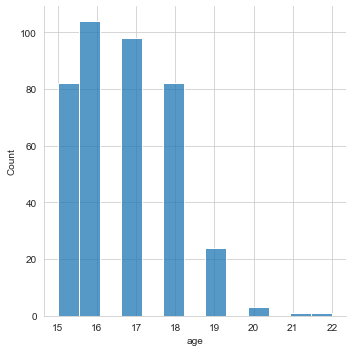

graph for absences


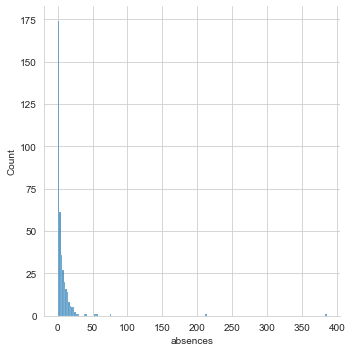

graph for score


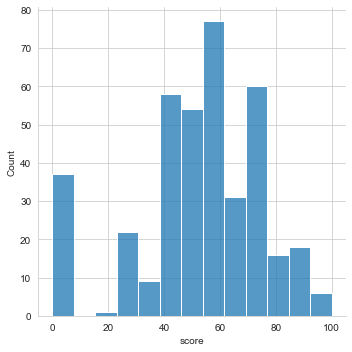

In [120]:
for i in df_ratio.columns:
    rat_num = df_ratio[i]
    print("graph for %s" % (i))
    #plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.displot(df_ratio, x = i)
#   sns.barplot(x = ord_num.index, y = ord_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

In [121]:
# В столбце absences наблюдаем два выброса. Избавимся от них

<AxesSubplot:>

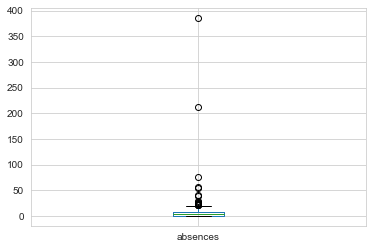

In [122]:
df.absences.plot(kind="box")

In [123]:
df["absences"] = df.absences.apply(lambda x: df["absences"].median() if x > 100 else x)

In [124]:
df["absences"].isna().sum()

12

In [125]:
# Пропуски заполним модой


In [126]:
df["absences"].fillna(df.absences.mode()[0], inplace=True)

In [127]:
df["absences"].isna().sum()

0

<AxesSubplot:>

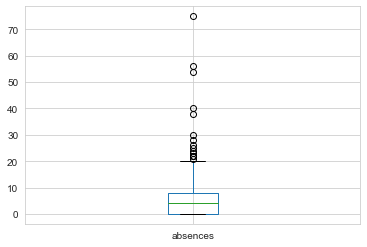

In [128]:
df.absences.plot(kind="box")

In [129]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         6
dtype: int64

In [130]:
# Осталось всего шесть пропусков в колонке score. Удилим строки с выбросами

In [131]:
df.dropna(how="any", inplace=True)

In [132]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

In [133]:
df.shape

(389, 26)

## Корреляционный анализ

In [134]:
df_dummies = pd.get_dummies(df, columns=["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       #"Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"], drop_first = True)

<AxesSubplot:>

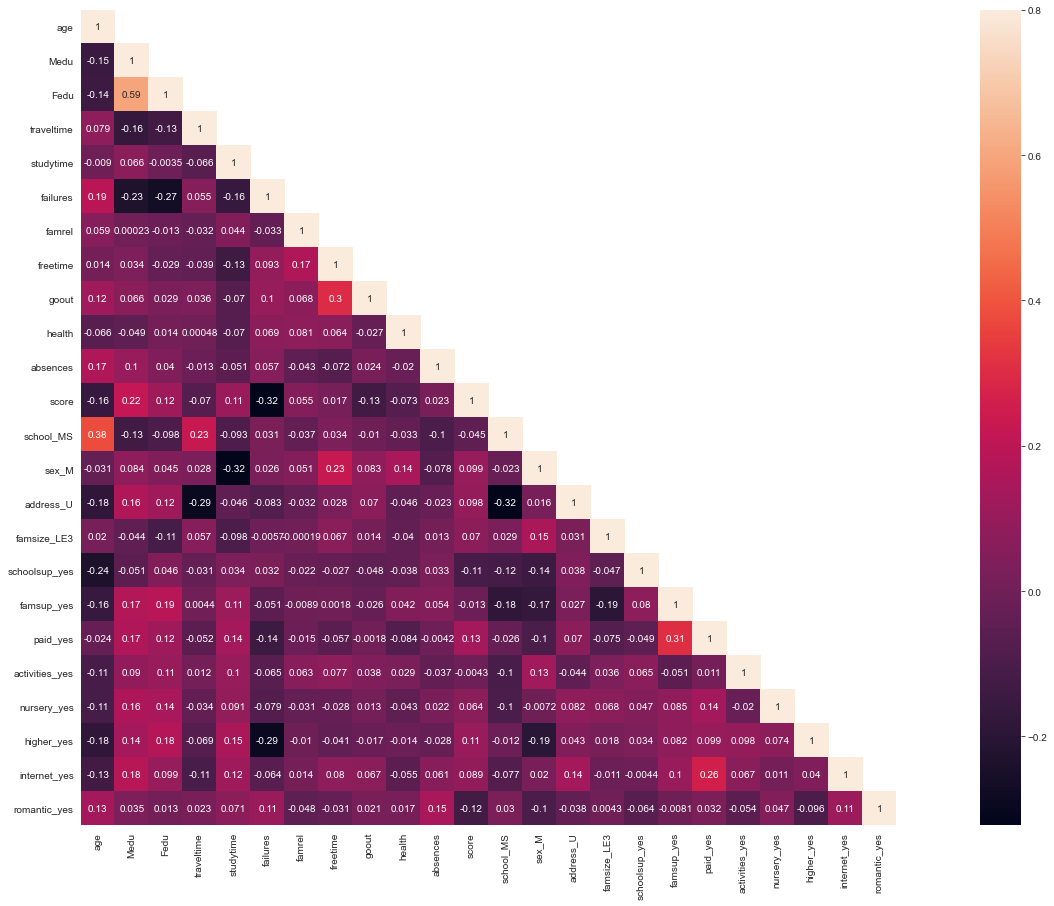

In [135]:
corrMatt = df_dummies.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [136]:
df.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

In [137]:
df_corr = df_dummies.corr()

## Переменные, влияющие на score

In [138]:
df_corr[(df_corr["score"] > 0.1) | (df_corr["score"] < -0.1)].score

age             -0.155726
Medu             0.217195
Fedu             0.116318
studytime        0.111433
failures        -0.322054
goout           -0.126945
score            1.000000
schoolsup_yes   -0.108003
paid_yes         0.131274
higher_yes       0.105803
romantic_yes    -0.120905
Name: score, dtype: float64

<AxesSubplot:xlabel='Mjob', ylabel='score'>

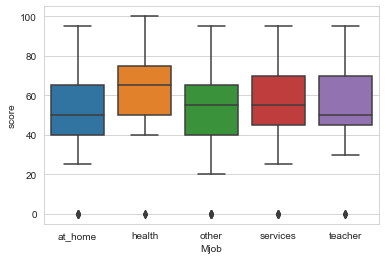

In [139]:
sns.boxplot(x="Mjob", y="score", data = df)

<AxesSubplot:xlabel='Fjob', ylabel='score'>

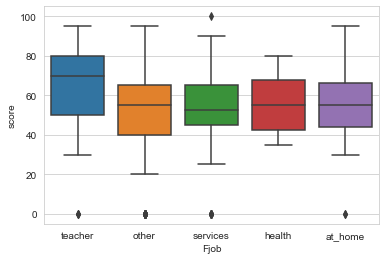

In [140]:
sns.boxplot(x="Fjob", y="score", data = df)

In [141]:
pd.pivot_table(df, index="Medu", values="score", aggfunc="mean")

,score
Medu,
0.0,65.000000
1.0,43.125000
2.0,48.921569
3.0,51.804124
4.0,58.816794


In [142]:
pd.pivot_table(df, index="Fedu", values="score", aggfunc="mean")

,score
Fedu,
0.0,65.000000
1.0,47.812500
2.0,50.913043
3.0,53.838384
4.0,55.806452


In [143]:
pd.pivot_table(df, index="studytime", values="score", aggfunc="mean")

,score
studytime,
1.0,49.952381
2.0,51.020942
3.0,57.769231
4.0,56.607143


In [144]:
pd.pivot_table(df, index="failures", values="score", aggfunc="mean")

,score
failures,
0.0,56.323529
1.0,39.200000
2.0,35.555556
3.0,33.000000


In [145]:
model_data = df_corr[(df_corr["score"] > 0.05) | (df_corr["score"] < -0.05)].index.tolist()

In [146]:
df_test = df_dummies.loc[:, model_data]

In [147]:
df_test.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,score,sex_M,address_U,famsize_LE3,schoolsup_yes,paid_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4.0,4.0,2.0,2.0,0.0,4.0,4.0,3.0,30.0,0,1,0,1,0,1,1,0,0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,30.0,0,1,0,0,0,0,1,1,0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,2.0,3.0,50.0,0,1,1,1,1,1,1,1,0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,5.0,75.0,0,1,0,0,1,1,1,1,1
4,16,3.0,3.0,1.0,2.0,0.0,4.0,2.0,5.0,50.0,0,1,0,0,1,1,1,0,0


### Строим модель

##### 1) Decision Tree

In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [168]:
y = df_test.score.values

In [171]:
X = df_test.drop("score", axis=1)

In [172]:
X.tail(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,sex_M,address_U,famsize_LE3,schoolsup_yes,paid_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
385,18,2.0,2.0,3.0,3.0,0.0,5.0,3.0,4.0,0,0,0,0,1,1,1,1,0
386,18,4.0,4.0,3.0,1.0,0.0,4.0,3.0,5.0,0,0,0,0,1,1,1,1,1
387,19,2.0,3.0,1.0,3.0,1.0,5.0,2.0,5.0,0,0,0,0,0,0,1,1,0
388,18,3.0,1.0,1.0,2.0,0.0,4.0,4.0,1.0,0,1,1,0,1,1,1,1,0
389,18,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,0,1,0,0,0,1,1,0,0
390,20,2.0,2.0,1.0,2.0,2.0,5.0,4.0,4.0,1,1,1,0,1,1,1,0,0
391,17,3.0,1.0,2.0,1.0,0.0,2.0,5.0,2.0,1,1,1,0,0,0,1,1,0
392,21,1.0,1.0,1.0,1.0,3.0,5.0,3.0,3.0,1,0,0,1,0,0,0,0,0
393,18,3.0,2.0,3.0,1.0,0.0,4.0,1.0,5.0,1,0,1,0,0,0,1,1,0
394,19,1.0,1.0,1.0,1.0,0.0,3.0,3.0,5.0,1,1,1,0,0,1,1,1,0


In [153]:
score_model = DecisionTreeRegressor(random_state=1)

In [154]:
score_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [155]:
score_model.predict(X.tail(10))

array([50., 30.,  0., 40.,  0., 45., 80., 35., 50., 45.])

In [156]:
predicted_score = score_model.predict(X)
mean_absolute_error(y, predicted_score)

0.0

In [157]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [158]:
score_model = DecisionTreeRegressor(max_leaf_nodes = 5, random_state=1)

In [159]:
score_model.fit(train_X, train_y)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=1)

In [160]:
val_predictions = score_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

16.422257317985082


In [161]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [162]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  16
Max leaf nodes: 50  		 Mean Absolute Error:  18
Max leaf nodes: 500  		 Mean Absolute Error:  25
Max leaf nodes: 5000  		 Mean Absolute Error:  25


##### 2) Random Forest

In [163]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

17.439795918367345


##### 3) Multiple Linear Regression

In [174]:
import statsmodels.api as sm

In [173]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [175]:
X_sm = X = sm.add_constant(X)

In [176]:
model = sm.OLS(y, X_sm)

In [180]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     5.088
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           2.02e-10
Time:                        22:13:46   Log-Likelihood:                -1726.8
No. Observations:                 389   AIC:                             3492.
Df Residuals:                     370   BIC:                             3567.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            71.7835     19.100      3.758      0.000      34.225     109.342
age              -1.6002      0.939     -1.704      0.089      -3.446       0.246
Medu              3.0478      1.272      2.395      0.017       0.546       5.550
Fedu             -0.9984      1.273     -0.785      0.433      -3.501       1.504
traveltime       -0.3275      1.629     -0.201      0.841      -3.532       2.877
studytime         2.4456      1.378      1.775      0.077      -0.264       5.156
failures         -6.9854      1.611     -4.335      0.000     -10.154      -3.817
famrel            1.2920      1.205      1.072      0.284      -1.078       3.662
goout            -2.4323      0.989     -2.458      0.014      -4.378      -0.487
health           -1.0657      0.800     -1.333      0.183      -2.638       0.507
sex_M             5.0671      2.410      2.103      0.036       0.328       9.806
address_U         2.3475      2.745      0.855      0.393      -3.050       7.745
famsize_LE3       3.0202      2.370      1.275      0.203      -1.639       7.680
schoolsup_yes    -7.2407      3.283     -2.206      0.028     -13.696      -0.785
paid_yes          3.0246      2.292      1.320      0.188      -1.482       7.532
nursery_yes       0.2786      2.681      0.104      0.917      -4.993       5.550
higher_yes        0.2275      4.309      0.053      0.958      -8.245       8.700
internet_yes      1.0214      2.860      0.357      0.721      -4.603       6.646
romantic_yes     -4.1819      2.315     -1.807      0.072      -8.733       0.370
==============================================================================
Omnibus:                       34.784   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.966
Skew:                          -0.737   Prob(JB):                     7.71e-10
Kurtosis:                       3.643   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# p-value < 0.05

a = ["Medu", "failures", "goout", "sex_M", "schoolsup_yes"]

In [183]:
df_test.corr().loc[a, "score"]

Medu             0.217195
failures        -0.322054
goout           -0.126945
sex_M            0.099285
schoolsup_yes   -0.108003
Name: score, dtype: float64